This notebook uses the network created by ```Topology_clique_activity_experiment.ipynb```, and ablates all connections to run a reference unconnected run.

In [1]:
import os
os.environ["SNUDDA_DATA"] = "../../../../BasalGangliaData/data/"
assert os.path.isdir(os.getenv("SNUDDA_DATA")), f"You need to have BasalGangliaData installed for this example."

network_path = "topology100"
network_file = os.path.join(network_path, "network-synapses.hdf5")
simplex_file_name = os.path.join(network_path, "topology100_D6_simplices0.simplices")
ablated_network_file = os.path.join(network_path, "network-fully-ablated.hdf5")

remove_sink_to_source_connections = True

In [2]:
from snudda.analyse.analyse_topology import SnuddaAnalyseTopology
sat = SnuddaAnalyseTopology(network_file=network_file)
sat.load_simplex_file(simplex_file_name=simplex_file_name)
mult = sat.get_fixed_multiplicity()

Loading 99 neurons with 6999 synapses and 0 gap junctions
Loading 99 neurons with 6999 synapses and 0 gap junctions
Loaded simplex data of dimension 6 from topology100/topology100_D6_simplices0.simplices


Here we list all simplices with 3 dSPN, 3 iSPN and 1 FS. Then we pick one of them as the simplex to analyse.

In [3]:
filt_mult = sat.filter_multiplicity(mult, dimension=6,
            neuron_type_list=[["dSPN", 3], ["iSPN", 3], ["FS",1]],
            multiplicity_requirement=None)

In [4]:
selected_clique_neurons = list(filt_mult)[0]

In [5]:
selected_clique_neurons

(92, 26, 43, 65, 95, 96, 33)

### Fully Ablating network

In [6]:
from snudda.utils.ablate_network import SnuddaAblateNetwork
san = SnuddaAblateNetwork(network_file=network_file)
san.only_keep_neuron_id(selected_clique_neurons)

Loading 99 neurons with 6999 synapses and 0 gap junctions


In [7]:
san.ablate_all_synapses()

Note that the neurons get remapped, when we ablate the network and remove a subset of the neurons.

In [8]:
san.write_network(out_file_name=ablated_network_file, print_remapping=True)

Writing to topology100/network-fully-ablated.hdf5
Copying morphologies
Keeping 7 neurons.

Remapping neurons:
92 -> 0
26 -> 1
43 -> 2
65 -> 3
95 -> 4
96 -> 5
33 -> 6

0/0 synapses processed
Filtering done.
Copying synapses and gap junctions
0 / 0 synapse rows parsed
Synapse matrix written.
Keeping 0 synapses (out of 6999)
0 / 0 gap junction rows parsed
Gap junction matrix written.
Keeping 0  gap junctions (out of 0)


### Simulating network

Next step is running the network with current injections (we should also run it with synaptic input).

In [9]:
experiment_config_file = "topology_clique_simulation_experiment-6a.json"
from snudda.simulate.pair_recording import PairRecording 
pr = PairRecording(network_path=network_path, network_file=ablated_network_file,
                   experiment_config_file=experiment_config_file)

Pair recording output file: topology100/simulation/TCS-output-6a.hdf5
Loading 7 neurons with 0 synapses and 0 gap junctions
Setting tmGabaA reversal potential to -65.0 mV


In [10]:
pr.run()

Running simulation for 1.0 s
Running Neuron simulator 1000 ms, with dt=0.025
1% done. Elapsed: 0.5 s, estimated time left: 45.2 s
99% done. Elapsed: 45.6 s, estimated time left: 0.5 s
Neuron simulation finished
Simulation run time: 46.0 s
Writing network output to topology100/simulation/TCS-output-6a.hdf5
CHeck why not able to save...
Using sample dt = None (sample step size None)
Worker 1/1 writing data to topology100/simulation/TCS-output-6a.hdf5


Loading network info from topology100/network-fully-ablated.hdf5
Loading 7 neurons with 0 synapses and 0 gap junctions
Loading topology100/simulation/TCS-output-6a.hdf5
Plotting traces: [0, 1, 2, 3, 4, 5, 6]
Plotted 7 traces (total 7)


<IPython.core.display.Javascript object>


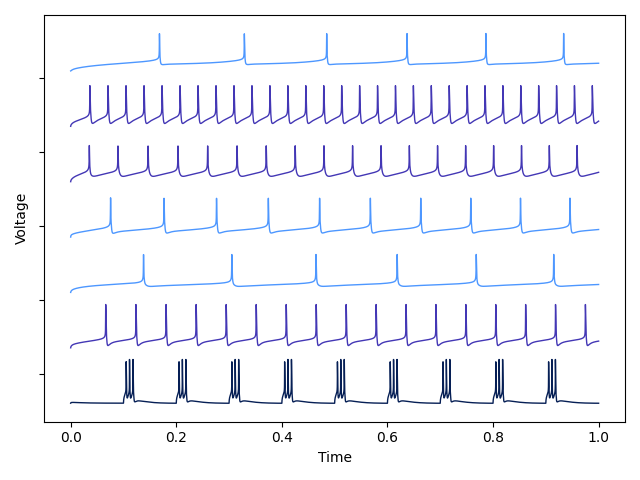

Saving to figure /home/ilaria/Documents/GitHubSSH/Snudda/examples/notebooks/Topology/topology100/figures/Network-voltage-trace-TopologyClique-6a-iSPN-FS-dSPN.pdf


In [11]:
%matplotlib notebook
pr.plot_trace_overview()

In [12]:
pr.plot_traces()